# Predicting the required inventory level of an engine part: Camshaft 
### This is not real dataset 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


np.random.seed(42)

# Number of rows in the dataset
num_rows = 30

# Generate Time Series Data (assuming daily data for 30 days)
timestamp_data = [datetime(2022, 1, 1) + timedelta(days=i) for i in range(num_rows)]

# Generate random data for Inventory Levels, Lead Time, and Delays
inventory_levels = np.linspace(3, 15, num_rows)  # Increasing from 3 to 15
lead_time = np.random.randint(1, 14, size=num_rows)
delays = np.random.randint(1, 6, size=num_rows)

# Set constant values for Engine Part and Suppliers
engine_part = 'Camshaft'
suppliers = np.random.choice(['Finning', 'Caterpillar', 'RMH Industry'], size=num_rows)

# Generate random data for Economic Conditions
economic_conditions = np.random.normal(0, 1, size=num_rows)

# Generate random data for the target variable - Number of Units
number_of_units = np.random.randint(50, 200, size=num_rows)

# Create the DataFrame
data = {
    'Timestamp': timestamp_data,
    'Inventory_Levels': inventory_levels,
    'Lead_Time': lead_time,
    'Engine_Part': [engine_part] * num_rows,
    'Supplier': suppliers,
    'Economic_Conditions': economic_conditions,
    'Delays': delays,
    'Number_of_Units': number_of_units
}

df = pd.DataFrame(data)

# Display the generated dataset
df.head()


,Timestamp,Inventory_Levels,Lead_Time,Engine_Part,Supplier,Economic_Conditions,Delays,Number_of_Units
0,2022-01-01,3.000000,7,Camshaft,RMH Industry,0.773700,2,112
1,2022-01-02,3.413793,4,Camshaft,RMH Industry,-0.538142,5,145
2,2022-01-03,3.827586,13,Camshaft,Finning,-1.346678,4,101
3,2022-01-04,4.241379,11,Camshaft,RMH Industry,-0.880591,1,145
4,2022-01-05,4.655172,8,Camshaft,RMH Industry,-1.130552,1,181


## Heatmap

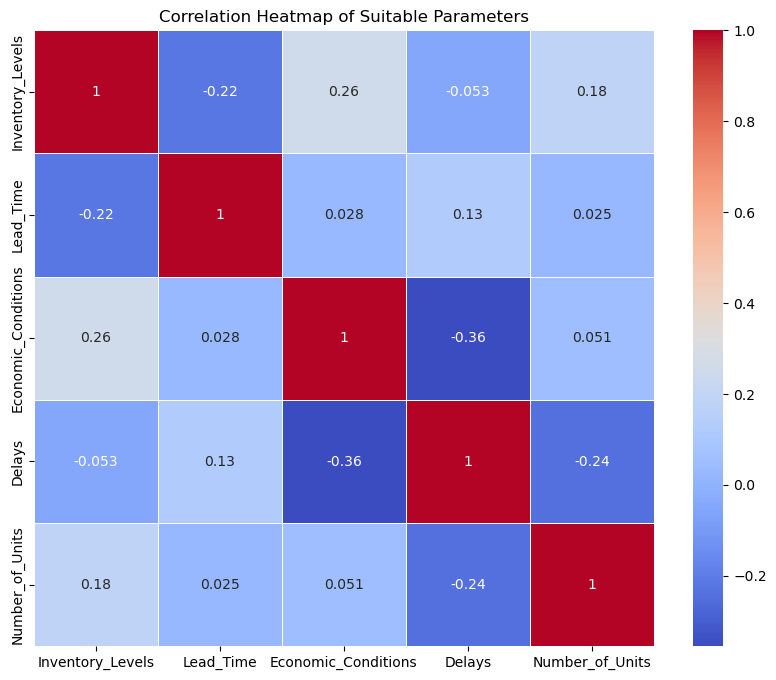

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df[['Inventory_Levels', 'Lead_Time', 'Economic_Conditions', 'Delays', 'Number_of_Units']]
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Display the heatmap
plt.title('Correlation Heatmap of Suitable Parameters')
plt.show()


In [3]:
# Convert categorical variables into numeric values
df_numeric = pd.get_dummies(df, columns=['Engine_Part', 'Supplier'], drop_first=True)

# Display the updated DataFrame
df_numeric.head()


,Timestamp,Inventory_Levels,Lead_Time,Economic_Conditions,Delays,Number_of_Units,Supplier_Finning,Supplier_RMH Industry
0,2022-01-01,3.000000,7,0.773700,2,112,0,1
1,2022-01-02,3.413793,4,-0.538142,5,145,0,1
2,2022-01-03,3.827586,13,-1.346678,4,101,1,0
3,2022-01-04,4.241379,11,-0.880591,1,145,0,1
4,2022-01-05,4.655172,8,-1.130552,1,181,0,1


## Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Inventory_Levels', 'Lead_Time', 'Economic_Conditions', 'Delays', 'Number_of_Units']

scaler = MinMaxScaler()

# Normalize the numeric columns
df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])

# Display the normalized DataFrame
df_numeric.head()


,Timestamp,Inventory_Levels,Lead_Time,Economic_Conditions,Delays,Number_of_Units,Supplier_Finning,Supplier_RMH Industry
0,2022-01-01,0.000000,0.500000,0.467550,0.25,0.384615,0,1
1,2022-01-02,0.034483,0.250000,0.198755,1.00,0.638462,0,1
2,2022-01-03,0.068966,1.000000,0.033086,0.75,0.300000,1,0
3,2022-01-04,0.103448,0.833333,0.128587,0.00,0.638462,0,1
4,2022-01-05,0.137931,0.583333,0.077370,0.00,0.915385,0,1


## Split the dataset

In [5]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df_numeric.drop('Number_of_Units', axis=1)
y = df_numeric['Number_of_Units']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (24, 7)
Shape of X_test: (6, 7)
Shape of y_train: (24,)
Shape of y_test: (6,)


In [6]:
y_train

28    0.830769
24    0.607692
12    0.407692
0     0.384615
4     0.915385
16    0.115385
5     1.000000
13    0.246154
11    0.115385
22    0.476923
1     0.638462
2     0.300000
25    0.892308
3     0.638462
21    0.130769
26    0.830769
18    0.730769
29    0.792308
20    0.546154
7     0.176923
10    0.561538
14    0.376923
19    0.238462
6     0.123077
Name: Number_of_Units, dtype: float64

## Train the model on the training data

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train = X_train.select_dtypes(include=['float64', 'int64'])

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.22231847991673526
Root Mean Squared Error: 0.2636981995096604


## Updates i wants to impliment  
### Model should pick realtime data using Data Processing Pipelines.
### The model should predict multiple inventory items. 